In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

color = sns.color_palette()
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
data = pd.read_json("../Dataset/train.json")

In [3]:
data.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street
100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",low,40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275,333 East 49th Street
100013,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],low,40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350,500 West 143rd Street


In general, this dataset consists of numerical, text, categorical, date and photos features.

In [4]:
# analyse the shape of train dataset
print("Total number of rows: {}".format(data.shape[0]))
print("Total numnber of columns: {}".format(data.shape[1]))

Total number of rows: 49352
Total numnber of columns: 15


In [5]:
# analyze datatypes
data.dtypes

bathrooms          float64
bedrooms             int64
building_id         object
created             object
description         object
display_address     object
features            object
interest_level      object
latitude           float64
listing_id           int64
longitude          float64
manager_id          object
photos              object
price                int64
street_address      object
dtype: object

There are 6 numerical data and 7 text data in total.

In [6]:
# describe the training dataset
# display mean, count, std,
# max, min and quartile
data.describe()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,49352.00000,49352.000000,49352.000000,4.935200e+04,49352.000000,4.935200e+04
mean,1.21218,1.541640,40.741545,7.024055e+06,-73.955716,3.830174e+03
std,0.50142,1.115018,0.638535,1.262746e+05,1.177912,2.206687e+04
min,0.00000,0.000000,0.000000,6.811957e+06,-118.271000,4.300000e+01
25%,1.00000,1.000000,40.728300,6.915888e+06,-73.991700,2.500000e+03
50%,1.00000,1.000000,40.751800,7.021070e+06,-73.977900,3.150000e+03
75%,1.00000,2.000000,40.774300,7.128733e+06,-73.954800,4.100000e+03
max,10.00000,8.000000,44.883500,7.753784e+06,0.000000,4.490000e+06


# Analyze target variable

In [7]:
target = data["interest_level"]

In [8]:
target_value_counts = target.value_counts()
print(target_value_counts)

low       34284
medium    11229
high       3839
Name: interest_level, dtype: int64


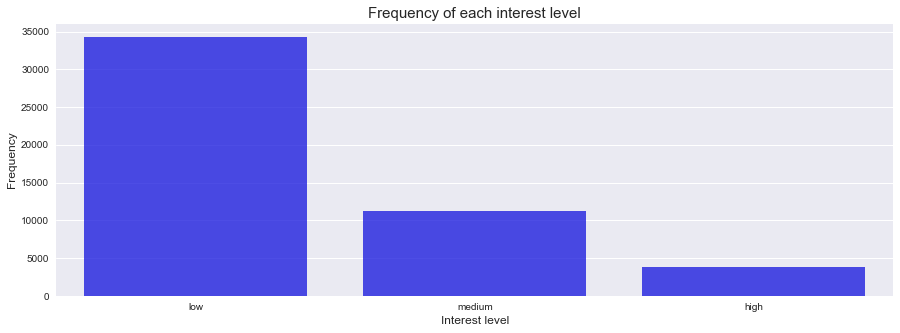

In [9]:
plt.figure(figsize=(15, 5))
sns.barplot(target_value_counts.index, target_value_counts.values, alpha=0.8, color="blue")
plt.title("Frequency of each interest level", fontsize=15)
plt.xlabel("Interest level", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

According to my analysis, interest level is low for most of the cases followed by medium and then high.

# Analyze numeric variables

In [10]:
# filter numeric data only
numeric = data._get_numeric_data() 

In [11]:
numeric.head()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
10,1.5,3,40.7145,7211212,-73.9425,3000
10000,1.0,2,40.7947,7150865,-73.9667,5465
100004,1.0,1,40.7388,6887163,-74.0018,2850
100007,1.0,1,40.7539,6888711,-73.9677,3275
100013,1.0,4,40.8241,6934781,-73.9493,3350


# Bathrooms

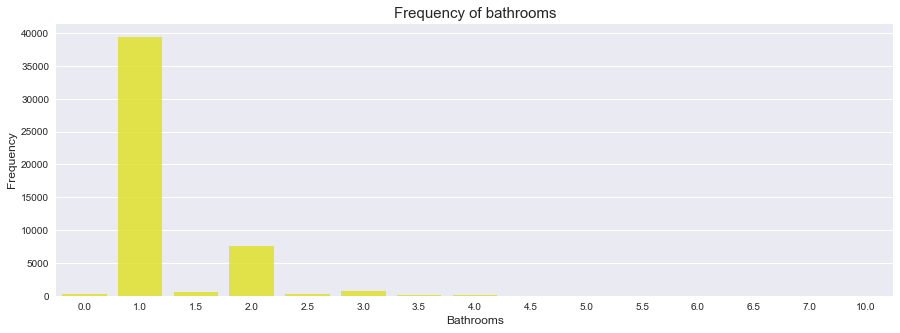

In [12]:
numeric_value_counts = numeric["bathrooms"].value_counts()

plt.figure(figsize=(15, 5))
sns.barplot(numeric_value_counts.index, numeric_value_counts.values, alpha=0.8, color="yellow")
plt.title("Frequency of bathrooms", fontsize=15)
plt.ylabel("Frequency", fontsize=12)
plt.xlabel("Bathrooms", fontsize=12)
plt.show()

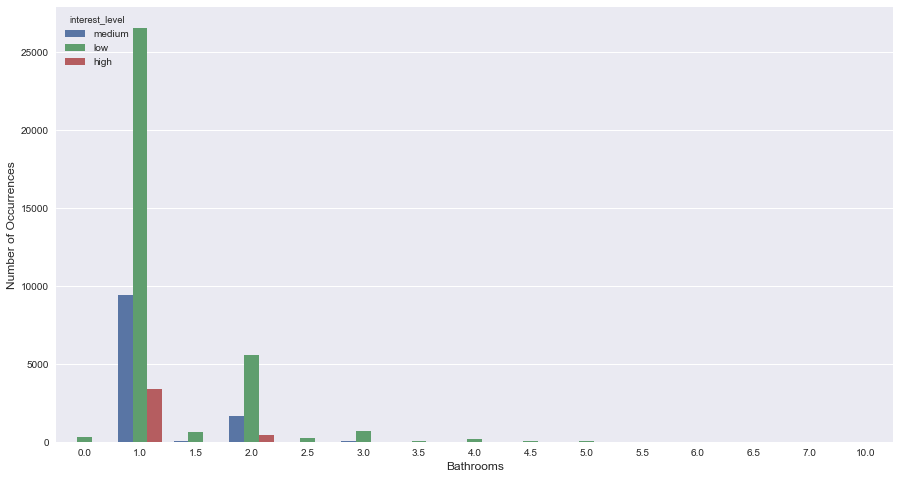

In [13]:
plt.figure(figsize=(15, 8))
sns.countplot(x='bathrooms', hue='interest_level', data=data)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Bathrooms', fontsize=12)
plt.show()

# Bedrooms

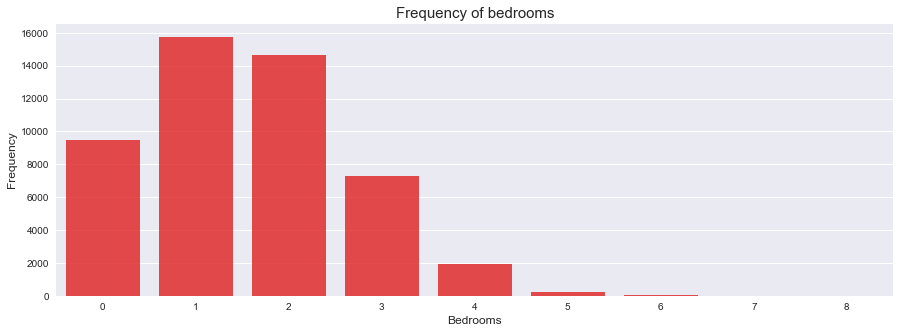

In [14]:
numeric_value_counts = numeric["bedrooms"].value_counts()

plt.figure(figsize=(15, 5))
sns.barplot(numeric_value_counts.index, numeric_value_counts.values, alpha=0.8, color="red")
plt.title("Frequency of bedrooms", fontsize=15)
plt.ylabel("Frequency", fontsize=12)
plt.xlabel("Bedrooms", fontsize=12)
plt.show()

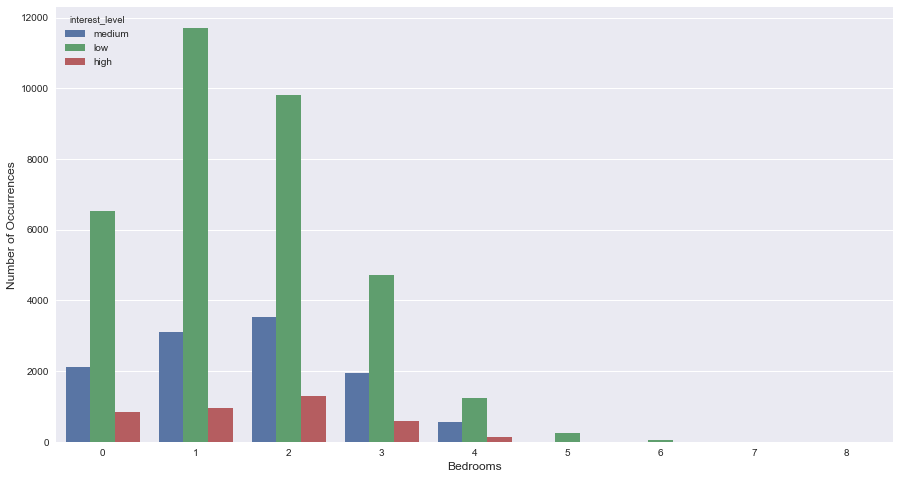

In [15]:
plt.figure(figsize=(15, 8))
sns.countplot(x='bedrooms', hue='interest_level', data=data)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Bedrooms', fontsize=12)
plt.show()

# Price

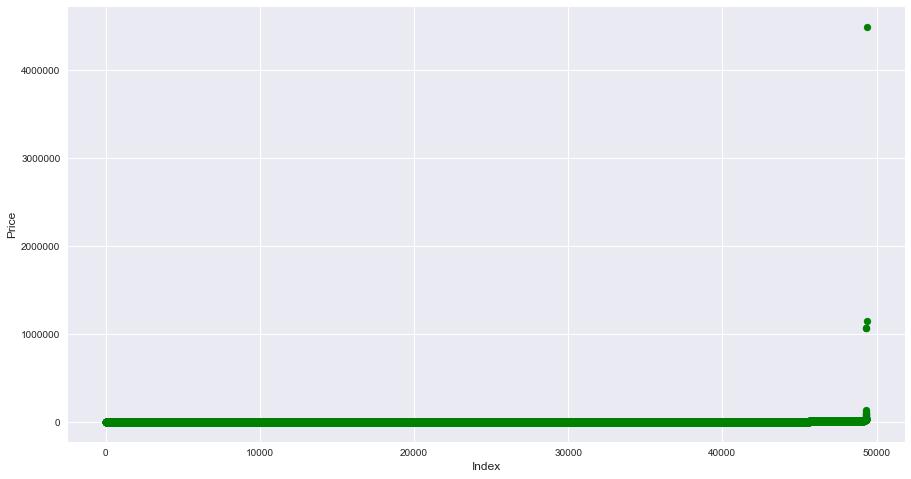

In [16]:
plt.figure(figsize=(15, 8))
plt.scatter(range(data.shape[0]), np.sort(data["price"].values), color="green")
plt.xlabel('Index', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.show()

Outliers are present in the target variable.

/Users/firdause/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


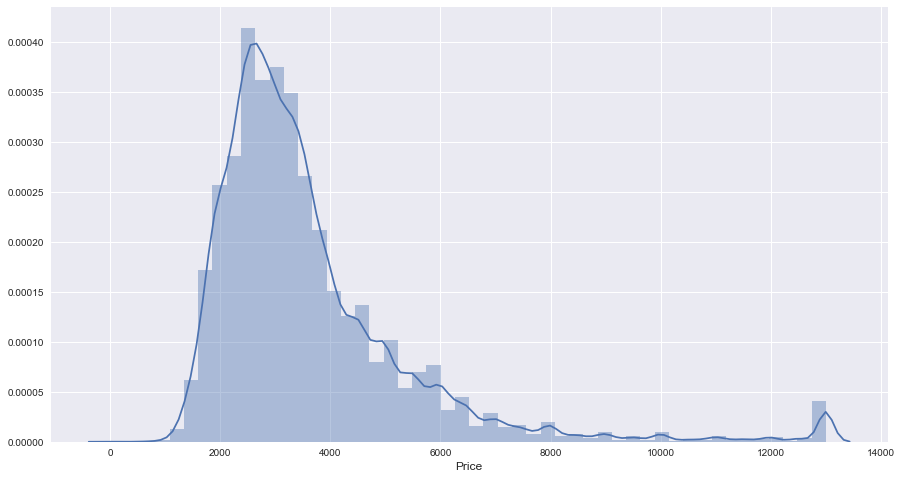

In [17]:
# remove outliers and replot the target variable
upper_limit = np.percentile(data["price"].values, 99)

data["price"].ix[data["price"] > upper_limit] = upper_limit

plt.figure(figsize=(15, 8))
sns.distplot(data["price"].values, bins=50, kde=True)
plt.xlabel('Price', fontsize=12)
plt.show()

# Latitude

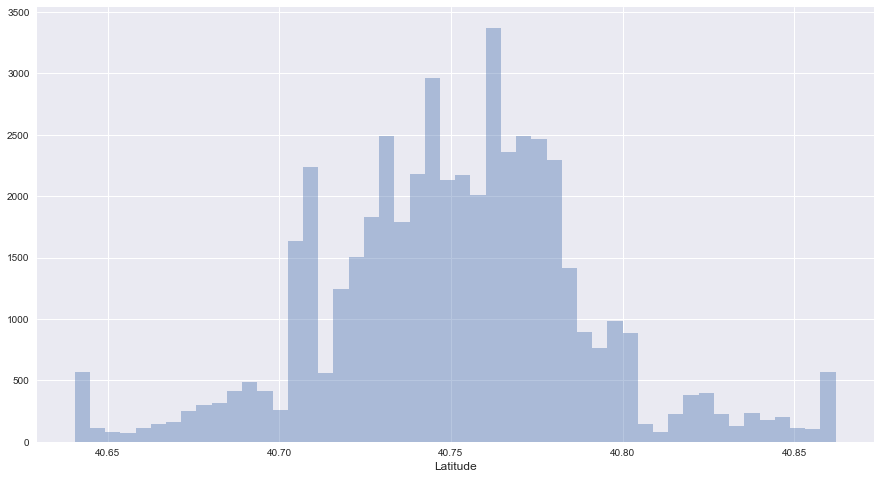

In [18]:
lower_limit = np.percentile(data["latitude"].values, 1)
upper_limit = np.percentile(data["latitude"].values, 99)

data["latitude"].ix[data["latitude"] < lower_limit] = lower_limit
data["latitude"].ix[data["latitude"] > upper_limit] = upper_limit

plt.figure(figsize=(15, 8))
sns.distplot(data["latitude"].values, bins=50, kde=False)
plt.xlabel('Latitude', fontsize=12)
plt.show()

Latitude ranges between 40.65 - 40.85

# Longitude

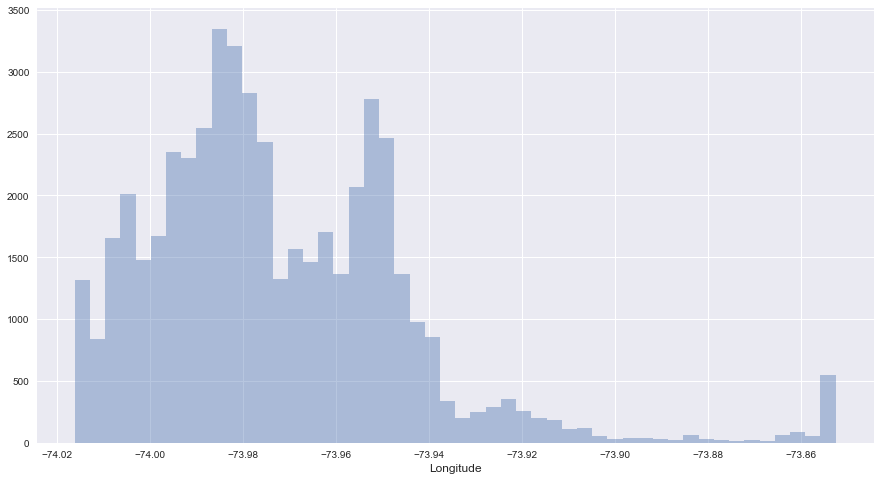

In [19]:
lower_limit = np.percentile(data["longitude"].values, 1)
upper_limit = np.percentile(data["longitude"].values, 99)

data["longitude"].ix[data["longitude"] < lower_limit] = lower_limit
data["longitude"].ix[data["longitude"] > upper_limit] = upper_limit

plt.figure(figsize=(15, 8))
sns.distplot(data["longitude"].values, bins=50, kde=False)
plt.xlabel('Longitude', fontsize=12)
plt.show()

Latitude ranges between -74.02 to -73.86

# Created

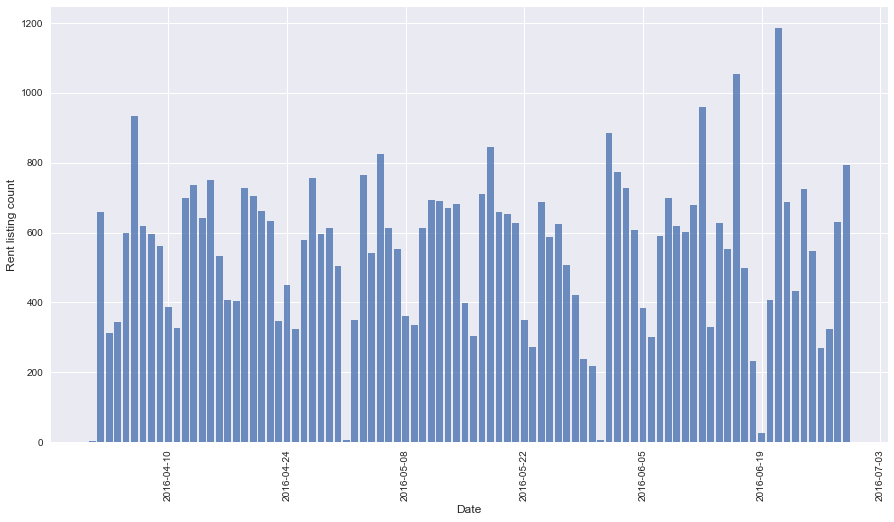

In [20]:
data["created"] = pd.to_datetime(data["created"])
data["date_created"] = data["created"].dt.date

created_value_counts = data["date_created"].value_counts()

plt.figure(figsize=(15, 8))
ax = plt.subplot(111)
ax.bar(created_value_counts.index, created_value_counts.values, alpha=0.8)
ax.xaxis_date()
plt.xticks(rotation="vertical")
plt.ylabel("Rent listing count", fontsize=12)
plt.xlabel("Date", fontsize=12)
plt.show()

Train dataset ranges from 10th of April 2016 - 3rd of July 2016.

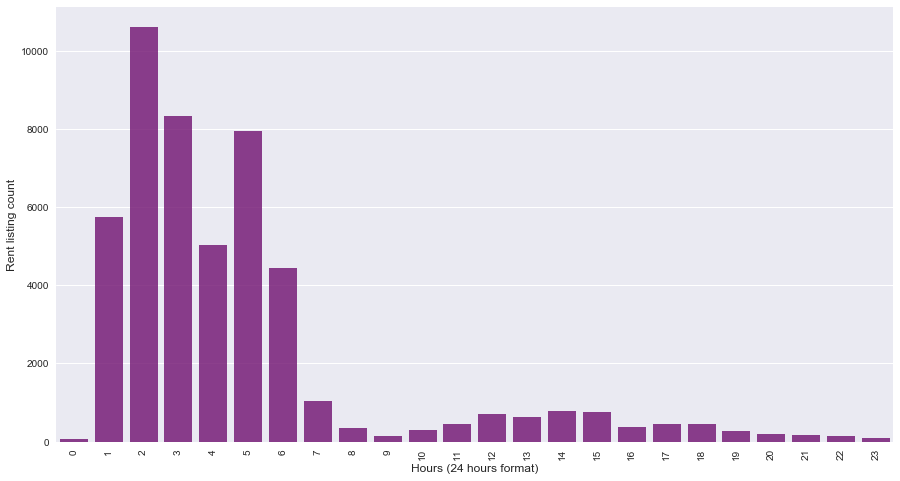

In [21]:
# plot hour listing trend
data["hour_created"] = data["created"].dt.hour
hour_value_counts = data["hour_created"].value_counts()

plt.figure(figsize=(15, 8))
sns.barplot(hour_value_counts.index, hour_value_counts.values, alpha=0.8, color="purple")
plt.xticks(rotation="vertical")
plt.ylabel("Rent listing count", fontsize=12)
plt.xlabel("Hours (24 hours format)", fontsize=12)
plt.show()

In general, rental listings were created during the early hours of the day (1 to 7am). 

It could be due to the fact that web traffic is less.

# Display address

Display_address that appear less than 2 times: 63.22%
Display_address that appear less than 10 times: 89.6%
Display_address that appear less than 50 times: 97.73%
Display_address that appear less than 100 times: 99.26%
Display_address that appear less than 500 times: 100.0%


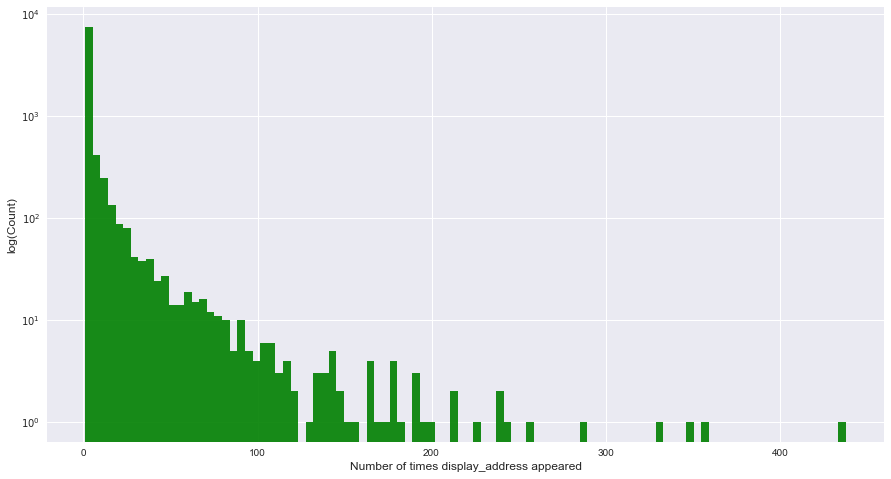

In [22]:
cnt_srs = data.groupby("display_address")["display_address"].count()

for i in [2, 10, 50, 100, 500]:
    print("Display_address that appear less than {} times: {}%".format(i, round((cnt_srs < i).mean() * 100, 2)))

plt.figure(figsize=(15, 8))
plt.hist(cnt_srs.values, bins=100, log=True, alpha=0.9, color="green")
plt.ylabel("log(Count)", fontsize=12)
plt.xlabel("Number of times display_address appeared", fontsize=12)
plt.show()

Most of the display addresses occur less than 100 times in the given training dataset. 

None of the display address occur more than 500 times.

# Photos

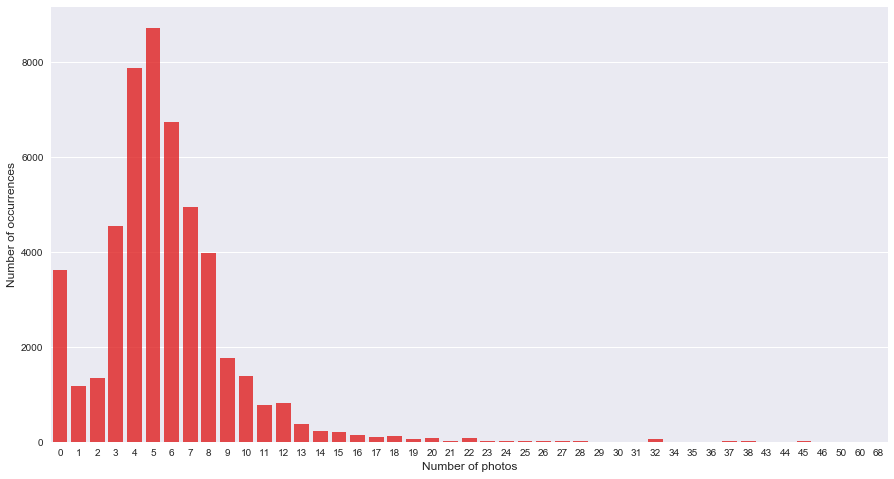

In [23]:
data["num_photos"] = data["photos"].apply(len)
cnt_srs = data['num_photos'].value_counts()

plt.figure(figsize=(15, 8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color="red")
plt.xlabel('Number of photos', fontsize=12)
plt.ylabel('Number of occurrences', fontsize=12)
plt.show()

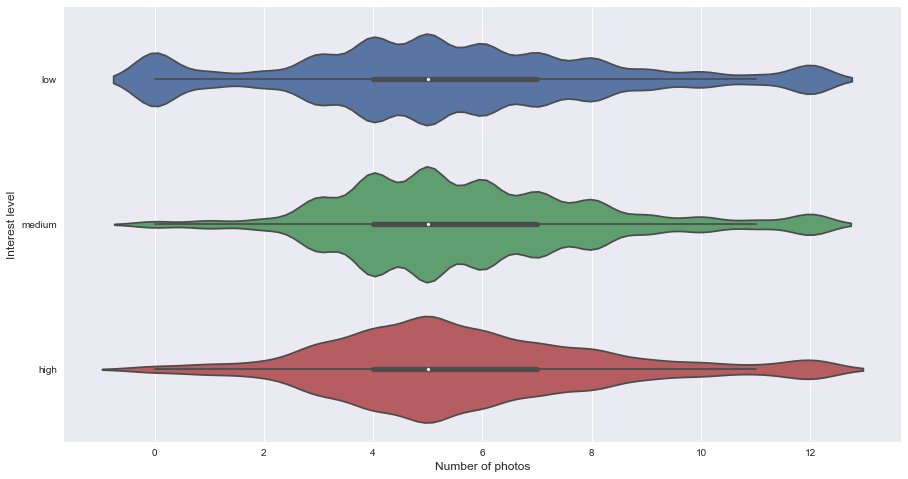

In [24]:
data["num_photos"].ix[data["num_photos"] > 12] = 12
plt.figure(figsize=(15, 8))
sns.violinplot(x="num_photos", y="interest_level", data=data, order =["low", "medium", "high"])
plt.xlabel("Number of photos", fontsize=12)
plt.ylabel("Interest level", fontsize=12)
plt.show()

# Features

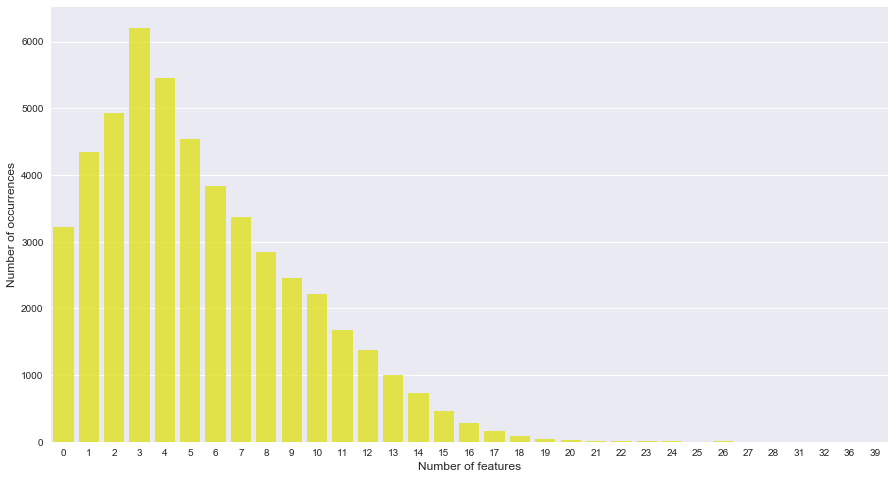

In [25]:
data["num_features"] = data["features"].apply(len)
cnt_srs = data['num_features'].value_counts()

plt.figure(figsize=(15, 8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color="yellow")
plt.xlabel('Number of features', fontsize=12)
plt.ylabel('Number of occurrences', fontsize=12)
plt.show()

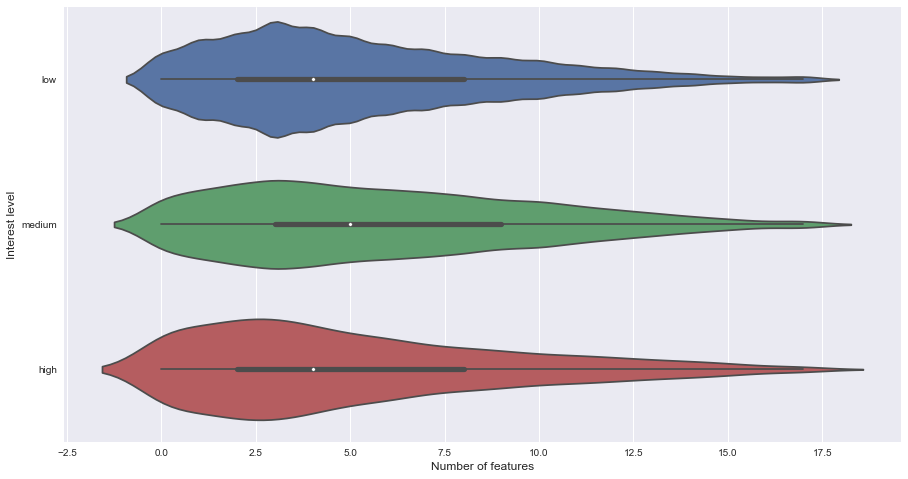

In [26]:
data["num_features"].ix[data["num_features"] > 17] = 17
plt.figure(figsize=(15, 8))
sns.violinplot(x="num_features", y="interest_level", data=data, order =["low", "medium", "high"])
plt.xlabel("Number of features", fontsize=12)
plt.ylabel("Interest level", fontsize=12)
plt.show()

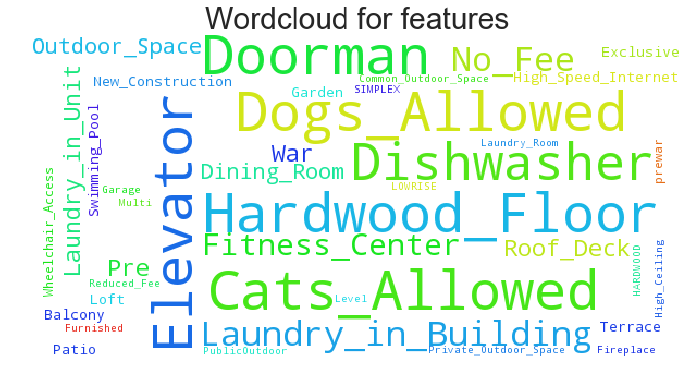

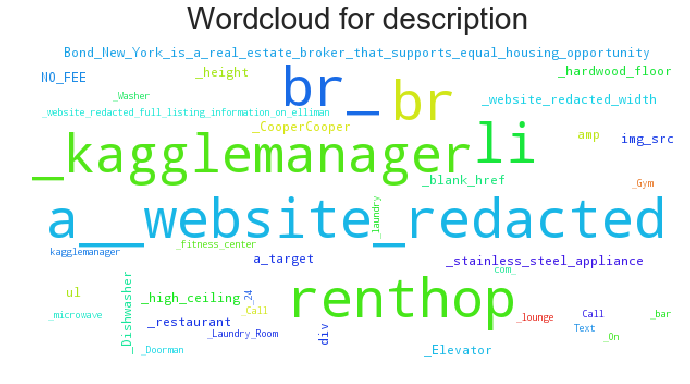

In [27]:
from wordcloud import WordCloud

text = ''
text_da = ''
text_desc = ''

for ind, row in data.iterrows():
    for feature in row['features']:
        text = " ".join([text, "_".join(feature.strip().split(" "))])
    text_da = " ".join([text_da, "_".join(row['description'].strip().split(" "))])
    #text_desc = " ".join([text_desc, row['description']])
    
text = text.strip()
text_da = text_da.strip()
text_desc = text_desc.strip()

plt.figure(figsize=(12,6))
wordcloud = WordCloud(background_color='white', width=600, height=300, max_font_size=50, max_words=40).generate(text)
wordcloud.recolor(random_state=0)
plt.imshow(wordcloud)
plt.title("Wordcloud for features", fontsize=30)
plt.axis("off")
plt.show()

# wordcloud for display address
plt.figure(figsize=(12,6))
wordcloud = WordCloud(background_color='white', width=600, height=300, max_font_size=50, max_words=40).generate(text_da)
wordcloud.recolor(random_state=0)
plt.imshow(wordcloud)
plt.title("Wordcloud for description", fontsize=30)
plt.axis("off")
plt.show()

# Plot scatter matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12ac43ad0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x113f35bd0>]], dtype=object)

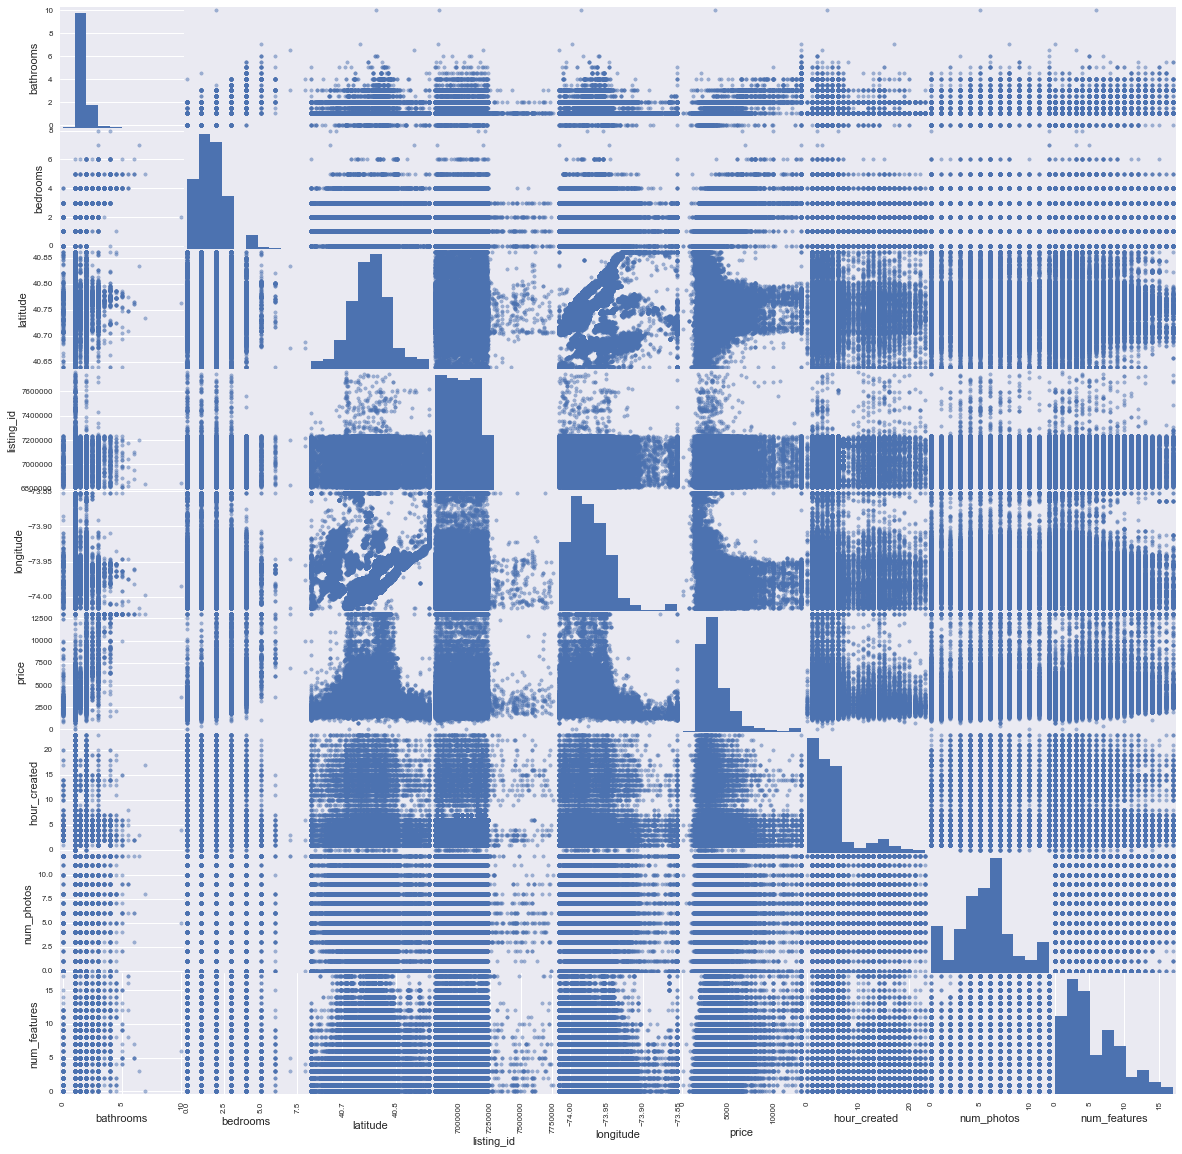

In [28]:
# A scatterplot shows the relationship between two variables as dots in two dimensions, 
# one axis for each attribute. You can create a scatterplot for each pair of attributes in your data. 
# Scatter plots are useful for spotting structured relationships between variables, 
# like whether you could summarize the relationship between two variables with a line. 
# Attributes with structured relationships may also be correlated and good candidates for removal from your dataset.
pd.scatter_matrix(data, figsize=(20, 20))

# Plot Pearson correlation matrix

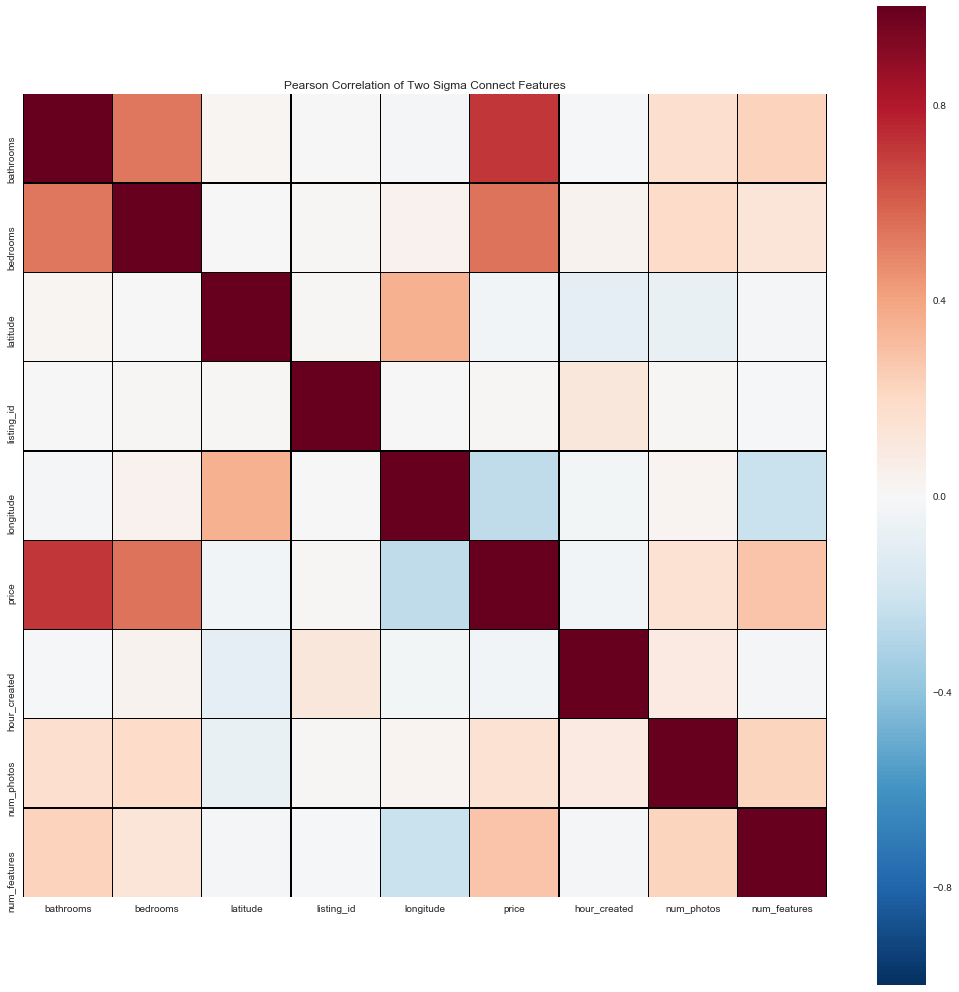

In [29]:
# Set up the matplotlib figure
plt.figure(figsize=(18, 18))
plt.title('Pearson Correlation of Two Sigma Connect Features')
# Draw the heatmap using seaborn
sns.heatmap(data.corr(), linewidths=0.25, vmax=1.0, square=True , linecolor='black')

# Principal component analysis: Part 1

In [30]:
# whether to standardize the data prior to a PCA on the 
# covariance matrix depends on the measurement scales 
# of the original features. Since PCA yields a feature 
# subspace that maximizes the variance along the axes, 
# it makes sense to standardize the data, especially, 
# if it was measured on different scales. 
numeric_data = data._get_numeric_data()

X_std = StandardScaler().fit_transform(numeric_data)

In [31]:
# calculating eigenvectors and eigenvalues of cov matirx
mean_vec = np.mean(X_std, axis=0)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

In [32]:
# create a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# sort from high to low
eig_pairs.sort(key = lambda x: x[0], reverse= True)

# calculation of Explained Variance from the eigenvalues
tot = sum(eig_vals)
# individual explained variance
var_exp = [(i/tot) * 100 for i in sorted(eig_vals, reverse=True)]
# cumulative explained variance
cum_var_exp = np.cumsum(var_exp) 

After sorting the eigenpairs, the next question is “how many principal components are we going to choose for our new feature subspace?” 

A useful measure is the so-called “explained variance,” which can be calculated from the eigenvalues. 

The explained variance tells us how much information (variance) can be attributed to each of the principal components.

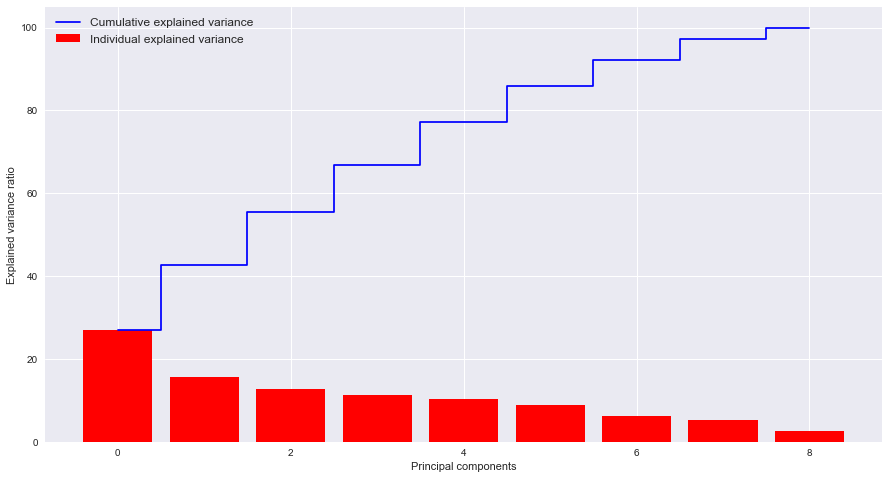

In [33]:
# plot explained variance superimpose
plt.figure(figsize=(15, 8))
plt.bar(range(9), var_exp, align="center", label="Individual explained variance", color="red")
plt.step(range(9), cum_var_exp, where="mid", label="Cumulative explained variance", color="blue")
plt.ylabel("Explained variance ratio")
plt.xlabel("Principal components")
plt.legend(loc="best", fontsize=12)
plt.show()

The plot above clearly shows that approximately 95% of the variance can be explained with the 8 principal components.

The first principal component still bears some information (26%) while the second and third principal components contain (17%) and (15%) variance. 

Let's implement PCA with 8 components (although to ensure that we are not excluding useful information, one should really go for 95% or greater variance level which corresponds to about 8 components).

# Principal component analysis: Part 2

Having roughly identified how many components/dimensions we would like to project on, let's now implement sklearn's PCA module.

The first line of the code contains the parameters "n_components" which states how many PCA components we want to project the dataset onto. Since we are going implement PCA with 8 components, therefore we set n_components=8.

The second line of the code calls the "fit_transform" method, which fits the PCA model with the standardised data X_std and applies the dimensionality reduction on this dataset.

In [34]:
pca = PCA(n_components=8)
X_pca = pca.fit_transform(X_std)

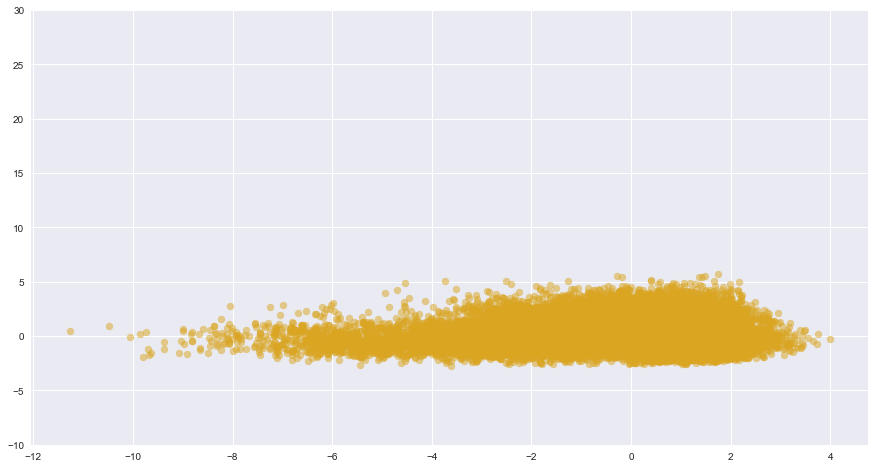

In [35]:
# Having now applied our specific PCA model with the movie dataset, 
# let's visualise the first 2 projection components as a 2D scatter 
# plot to see if we can get a quick feel for the underlying data.
plt.figure(figsize=(15, 8))
plt.scatter(X_pca[:,0], X_pca[:,2], c='goldenrod',alpha=0.5)
plt.ylim(-10, 30)
plt.show()

The main objective is to see if we can observe distinct clusters already present within the plots which would be able to tell us if our PCA-transformed data can indeed be linearly separable into different groups for later use as our new features.

According to my observation, the first visual impression is that there does not seem to be any discernible clusters.

Please note that the PCA projections contain another 6 components.

For now, let us assume that will be trying a 3-cluster KMeans to see if we are able to visualise any distinct clusters.

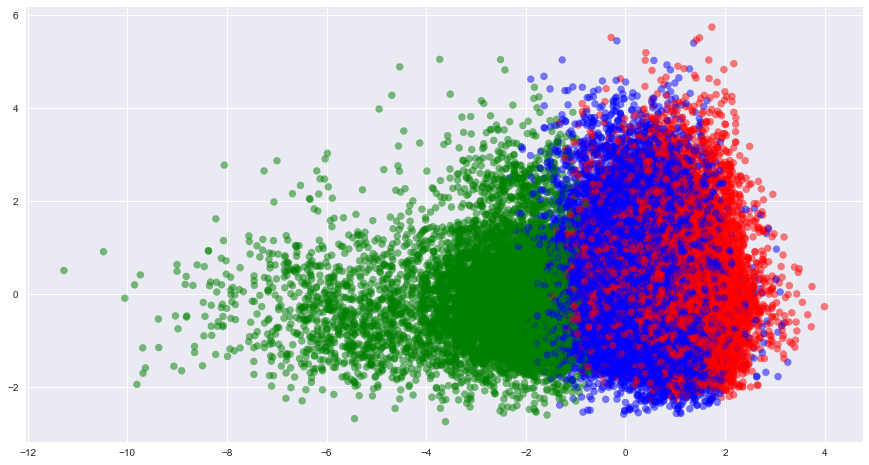

In [36]:
# Set a 3 KMeans clustering
kmeans = KMeans(n_clusters=3)

# Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(X_pca)

# Define our own color map
LABEL_COLOR_MAP = {0:"r", 1:"g", 2:"b"}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (15, 8))
plt.scatter(X_pca[:,0], X_pca[:,2], c= label_color, alpha=0.5) 
plt.show()

This KMeans plot looks more promising now as if our simple clustering model assumption turns out to be right, we can observe 3 distinguishable clusters via this color visualisation scheme.

The plot above was only for 2 PCA projections out of the 8 projections that we currently have.